In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
engine.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

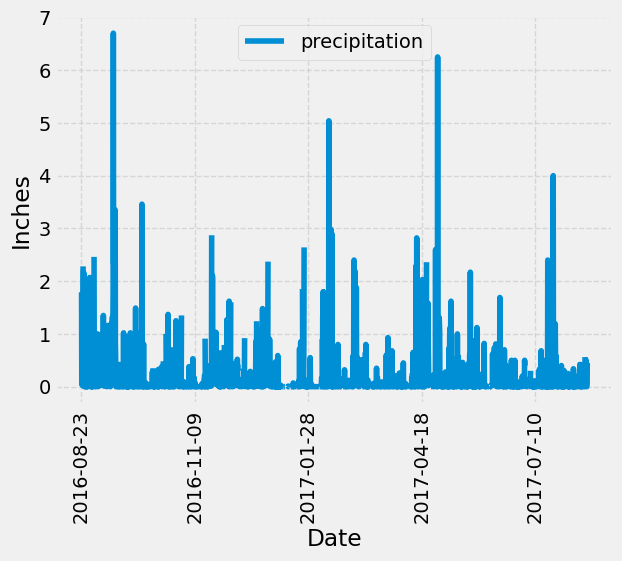

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prcp_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date

prcp_df= prcp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(x='date', y='precipitation',rot =90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_df['precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(measurement.station)).all()

[(19550,)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
count_query = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

for value, count in count_query:
    print(f"Value: {value}, Count: {count}")

Value: USC00519281, Count: 2772
Value: USC00519397, Count: 2724
Value: USC00513117, Count: 2709
Value: USC00519523, Count: 2669
Value: USC00516128, Count: 2612
Value: USC00514830, Count: 2202
Value: USC00511918, Count: 1979
Value: USC00517948, Count: 1372
Value: USC00518838, Count: 511


In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs), 
                      func.max(measurement.tobs), 
                      func.avg(measurement.tobs)).\
            filter(measurement.station == 'USC00519281').all()

# Accessing the results
min_temp, max_temp, avg_temp = temps[0]

# Printing the results
print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)
print("Average Temperature:", avg_temp)

Minimum Temperature: 54.0
Maximum Temperature: 85.0
Average Temperature: 71.66378066378067


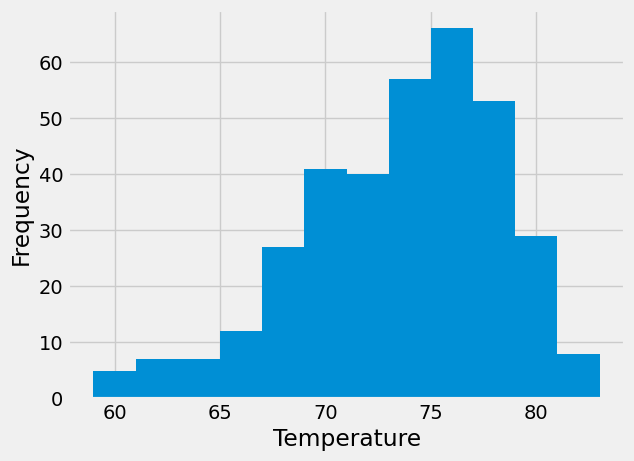

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_2 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()

temp_df = pd.DataFrame(results_2, columns=['date', 'temperature'])


temp_df['temperature'].plot(kind='hist', bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()